In [23]:
import cv2
import os, random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import binarize

WIDTH = 280
HEIGHT = 96

CAPTCHA_FOLDER = "captcha/"
PROCESSED_FOLDER = "processed/"

filename = random.choice(os.listdir("captcha"))


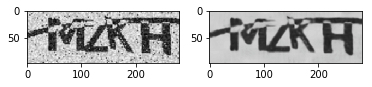

In [28]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 21)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.show()

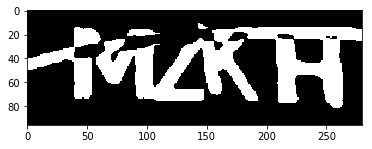

In [29]:
ret, thresh = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)
plt.show()

In [30]:
imgarr = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
imgarr[:, 8:WIDTH - 8] = 0
imagedata = np.where(imgarr == 255)

In [31]:
imgarr.shape

(96, 280)

In [32]:
imagedata

(array([15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17,
        17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
        19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21,
        22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24,
        24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 39, 39, 39, 40, 40,
        40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42,
        42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44,
        44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46,
        46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48,
        48, 48, 49, 49, 49, 49, 49]),
 array([272, 273, 274, 272, 273, 274, 275, 276, 277, 278, 279, 272, 273,
        274, 275, 276, 277, 278, 279, 272, 273, 274, 275, 276, 277, 278,
        279, 272, 273, 274, 275, 276, 277, 278, 279, 272, 273, 274, 275,
        276, 277, 278, 279, 272, 273, 274, 275, 276, 277, 2

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


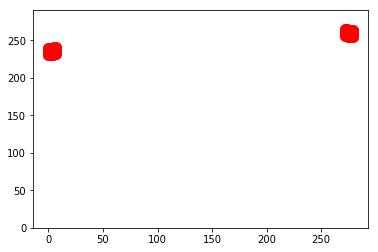

In [33]:
plt.scatter(imagedata[1], WIDTH - imagedata[0], s = 100, c = 'red', label = 'Cluster')
plt.ylim(ymin = 0)
plt.ylim(ymax = WIDTH + 10)
plt.show()

In [34]:
X = np.array([imagedata[1]])
Y = imgarr.shape[0] - imagedata[0]

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X.T)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
X2 = np.array([[i for i in range(0, imgarr.shape[1])]])

In [37]:
X2_ = poly_reg.fit_transform(X2.T)

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


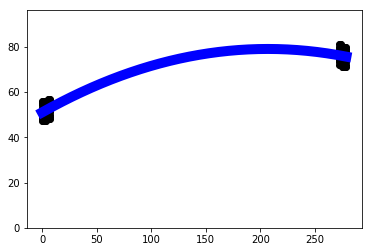

In [38]:
plt.scatter(X, Y, color = "black")
plt.ylim(ymin=0)
plt.ylim(ymax=imgarr.shape[0])
plt.plot(X2.T, regr.predict(X2_), color = "blue", linewidth = 10)

In [39]:
newimg = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
for ele in np.column_stack([regr.predict(X2_).round(2), X2[0]]):
    pos = imgarr.shape[0] - int(ele[0])
    newimg[pos - 3:pos + 3, int(ele[1])] = 255 - newimg[pos - 3: pos + 3, int(ele[1])]

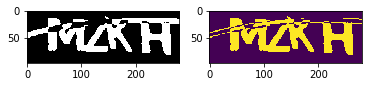

In [40]:
plt.subplot(121)
plt.imshow(thresh)
plt.subplot(122)
plt.imshow(newimg)
plt.show()

In [41]:
cv2.imwrite(PROCESSED_FOLDER + filename, newimg)

True